In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import os, sys
sys.path.append(os.path.abspath("../src"))

In [2]:
from keras.layers import (
    Dense, Conv2D, Conv2DTranspose, Flatten, MaxPool2D, Reshape, BatchNormalization
)
from keras.models import Model, Input, Sequential

Using TensorFlow backend.


In [3]:
from keras.layers import LeakyReLU

In [4]:
from sklearn.datasets import make_circles

In [5]:
X, y = make_circles(1024, noise=0.05, factor=0.6)

In [6]:
X = X[y==1]

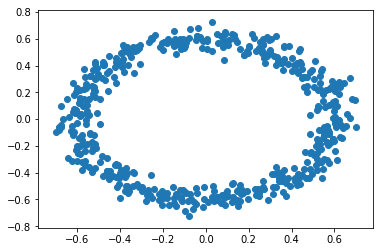

In [7]:
plt.scatter(X[:,0], X[:,1])

In [35]:
def create_discriminator(input_dim):
    model = Sequential([
        Dense(32, input_shape=input_dim),
        #BatchNormalization(),
        LeakyReLU(),
        Dense(32),
        #BatchNormalization(),
        LeakyReLU(),
        Dense(32),
        #BatchNormalization(),
        LeakyReLU(),
        Dense(1, activation="sigmoid")
    ])
    return model

def create_generator(noise_dim):
    model = Sequential([
        Dense(32, input_shape=(noise_dim,)),
        #BatchNormalization(),
        LeakyReLU(),
        Dense(32),
        #BatchNormalization(),
        LeakyReLU(),
        Dense(32),
        #BatchNormalization(),
        LeakyReLU(),
        Dense(2)
    ])
    return model

In [36]:
from gan import GAN

In [37]:
gan = GAN(create_discriminator_func=create_discriminator,
          create_generator_func=create_generator,
          noise_dim=8,
          input_dim=(2,))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 32)                288       
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 32)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 32)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 2)                 66        
Total para

/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [38]:
noise = np.random.normal(0, 1, size=(100,8))
predictions=[]
for i in range(400):
    gan.train(X, 1, batch_size=128)
    pr = gan.generator.predict(noise)
    predictions.append(pr)

/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0.7362294,0.68922937, 0.1015625,0.5107422
0.7264068,0.69119376, 0.2265625,0.5263672
0.71181613,0.6940539, 0.3828125,0.5546875
0.69979584,0.6962287, 0.5058594,0.5136719
0.68819696,0.6965904, 0.6894531,0.45507812
0.68312943,0.6943052, 0.83496094,0.43359375
0.67982733,0.6918669, 0.98046875,0.4638672
0.67677,0.69006824, 0.93652344,0.48632812
0.67474645,0.6892091, 0.83984375,0.5097656
0.6751833,0.68866587, 0.7685547,0.5058594
0.6750638,0.6894364, 0.7890625,0.47851562
0.6723034,0.69338673, 0.76171875,0.4716797
0.6743516,0.69706994, 0.5966797,0.5
0.6835525,0.69590354, 0.5644531,0.5371094
0.7002771,0.6917428, 0.34472656,0.6298828
0.7130451,0.68817127, 0.19628906,0.62890625
0.71717256,0.6870032, 0.26367188,0.5966797
0.7104725,0.6898469, 0.3671875,0.5517578
0.7006216,0.6948952, 0.4736328,0.49121094
0.6953031,0.6964682, 0.5,0.46289062
0.6961789,0.6939989, 0.43945312,0.4970703
0.6959113,0.6921332, 0.37402344,0.55859375
0.6963425,0.6893767, 0.37304688,0.5800781
0.69618094,0.6866741, 0.42578125,0.60

0.7159952,0.6758805, 0.5390625,0.62890625
0.716627,0.6765853, 0.54003906,0.6386719
0.71339273,0.67875576, 0.5332031,0.59375
0.71273625,0.6760939, 0.546875,0.6152344
0.7079135,0.6800611, 0.53125,0.5996094
0.71391857,0.6793196, 0.53125,0.59277344
0.71450496,0.6778648, 0.52246094,0.6220703
0.715055,0.6788745, 0.5136719,0.62890625
0.71103317,0.67885375, 0.5527344,0.6142578
0.711872,0.67919046, 0.5595703,0.6074219
0.71148086,0.6810919, 0.52246094,0.6152344
0.7110779,0.68155533, 0.5527344,0.578125
0.7105798,0.67991287, 0.55859375,0.5859375
0.7102201,0.6830941, 0.5078125,0.5878906
0.71374965,0.6792249, 0.50390625,0.59472656
0.71148545,0.68071765, 0.5488281,0.5888672
0.71257603,0.6794133, 0.5830078,0.58203125
0.70585585,0.6809176, 0.5830078,0.58984375
0.7042386,0.68240917, 0.51171875,0.58984375
0.70847183,0.6824653, 0.44140625,0.59277344
0.7097881,0.6811859, 0.51464844,0.5751953
0.7082045,0.6797282, 0.5498047,0.58691406
0.70372844,0.68502533, 0.51953125,0.55371094
0.7100546,0.6847704, 0.543945

0.6994864,0.6909524, 0.56933594,0.4873047
0.69774103,0.69085604, 0.54296875,0.49804688
0.69936645,0.6902148, 0.52441406,0.51171875
0.69635653,0.69188166, 0.6113281,0.48242188
0.69271076,0.69061685, 0.80566406,0.484375
0.6994431,0.69023114, 0.6816406,0.4716797
0.6929888,0.69122726, 0.6484375,0.48632812
0.6933151,0.6921265, 0.5888672,0.5
0.6962249,0.6919186, 0.625,0.47753906
0.69997793,0.6912316, 0.5341797,0.5078125
0.7007098,0.6926751, 0.53027344,0.49609375


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots(1,1, tight_layout=True)
fig.set_figheight(8)
fig.set_figwidth(8)
ax.axis('off')
ax.scatter(X[:,0], X[:,1])
ax.set_xlim([-1.4, 1.4])
ax.set_ylim([-1.4, 1.4])
txt = ax.text(-1.2, 1.2, "")
sc = ax.scatter([], [])

def animate(i):
    sc.set_offsets(predictions[i])
    txt.set_text(str(i))
    return (sc,)


# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=len(predictions), interval=100, blit=True)
plt.close(fig)

In [40]:
HTML(anim.to_html5_video())